<a href="https://colab.research.google.com/github/Razzf/MachineLearningTests/blob/master/LeafDiseaseData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
import cv2
import random
from IPython.display import clear_output
from google.colab.patches import cv2_imshow

In [ ]:
DATADIR = "/content/drive/My Drive/Plant_leave_diseases_dataset_with_augmentation (1)"
CATEGORIES = ["Apple___Apple_scab", "Apple___Black_rot", "Apple___Cedar_apple_rust",
              "Apple___healthy", "Blueberry___healthy", "Cherry_(including_sour)___Powdery_mildew",
              "Cherry_(including_sour)___healthy", "Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot",
              "Corn_(maize)___Common_rust_", "Corn_(maize)___Northern_Leaf_Blight", "Corn_(maize)___healthy",
              "Grape___Black_rot", "Grape___Esca_(Black_Measles)", "Grape___Leaf_blight_(Isariopsis_Leaf_Spot)",
              "Grape___healthy", "Orange___Haunglongbing_(Citrus_greening)", "Peach___Bacterial_spot",
              "Peach___healthy", "Pepper,_bell___Bacterial_spot", "Pepper,_bell___healthy", "Potato___Early_blight",
              "Potato___Late_blight", "Potato___healthy", "Raspberry___healthy", "Soybean___healthy",
              "Squash___Powdery_mildew", "Strawberry___Leaf_scorch", "Strawberry___healthy", 
              "Tomato___Bacterial_spot", "Tomato___Early_blight", "Tomato___Late_blight", "Tomato___Leaf_Mold",
              "Tomato___Septoria_leaf_spot", "Tomato___Spider_mites Two-spotted_spider_mite",
              "Tomato___Target_Spot", "Tomato___Tomato_Yellow_Leaf_Curl_Virus", "Tomato___healthy"]

CATEGORIES = ["Tomato___Bacterial_spot (1)", 
              "Tomato___Early_blight (1)",
              "Tomato___Late_blight (1)", "Tomato___Leaf_Mold (1)",
              "Tomato___Septoria_leaf_spot (1)",
              "Tomato___Spider_mites Two-spotted_spider_mite (1)",
              "Tomato___Target_Spot (1)",
              "Tomato___Tomato_Yellow_Leaf_Curl_Virus (1)",
              "Tomato___Tomato_mosaic_virus (1)",
              "Tomato___healthy (1)"]

<class 'list'>


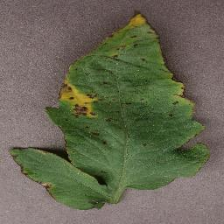

uint8


In [ ]:
IMG_SIZE = 224
for class_index, category in enumerate(CATEGORIES):
    path = os.path.join(DATADIR, category)

    for img_index, img in enumerate(os.listdir(path)):
      print(type(os.listdir(path)))
      img_array = cv2.imread(os.path.join(path, os.listdir(path)[random.randint(0, 999)]), cv2.IMREAD_UNCHANGED)
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      cv2_imshow(new_array)

      print(new_array.dtype)
      break
    break

In [ ]:
training_data = []
IMG_SIZE = 224
def create_training_data():
  for class_index, category in enumerate(CATEGORIES):
    path = os.path.join(DATADIR, category)
    class_array = [0,0,0,0,0,0,0,0,0,0]
    class_array[class_index] = 1
    for img_index, img in enumerate(os.listdir(path)):
      img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
      new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
      training_data.append((new_array, class_array, category))
      print('class: ', category)
      print("img_n: ", img_index)
      print('label: ', class_index)
      print(new_array.dtype)
      if (img_index + 1) % 2 == 0:
        clear_output()


In [ ]:
create_training_data()

In [ ]:
random.shuffle(training_data)

X = []
y = []

for features, label, name in training_data:
    X.append(features)
    y.append(label)

X = np.array(X, dtype=np.float16)
print(X.shape)
X = X.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(X.shape)
y = np.array(y)
print(y[0].size)

(10000, 224, 224, 3)
(10000, 224, 224, 3)
10


In [ ]:
import pickle

pickle_out = open("X_.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y_.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [ ]:
pip install -q tensorflow>=2 tfds-nightly matplotlib

In [ ]:
from tensorflow_datasets import testing
import tensorflow_datasets as tfds
from tensorflow_datasets.image_classification import plant_village

In [ ]:
print(X[0])

[[[0.7295 0.682  0.698 ]
  [0.6274 0.5806 0.596 ]
  [0.6196 0.569  0.5884]
  ...
  [0.533  0.4746 0.4863]
  [0.4392 0.3804 0.392 ]
  [0.4666 0.4119 0.4197]]

 [[0.6743 0.6274 0.643 ]
  [0.655  0.608  0.6235]
  [0.686  0.639  0.655 ]
  ...
  [0.545  0.4863 0.498 ]
  [0.4626 0.4038 0.4158]
  [0.498  0.4392 0.451 ]]

 [[0.655  0.608  0.6235]
  [0.6274 0.5806 0.596 ]
  [0.6313 0.5845 0.6   ]
  ...
  [0.5527 0.4941 0.506 ]
  [0.4941 0.4353 0.447 ]
  [0.5293 0.4707 0.4824]]

 ...

 [[0.7334 0.686  0.6943]
  [0.6743 0.6274 0.6353]
  [0.714  0.6665 0.6743]
  ...
  [0.5527 0.498  0.498 ]
  [0.5923 0.537  0.537 ]
  [0.4746 0.4197 0.4197]]

 [[0.6743 0.6274 0.6353]
  [0.682  0.6353 0.643 ]
  [0.7295 0.682  0.6904]
  ...
  [0.502  0.447  0.447 ]
  [0.5215 0.4666 0.4666]
  [0.5806 0.5254 0.5254]]

 [[0.6943 0.647  0.655 ]
  [0.702  0.651  0.6587]
  [0.6743 0.6274 0.6353]
  ...
  [0.545  0.4902 0.4902]
  [0.5845 0.5293 0.5293]
  [0.6274 0.5728 0.5728]]]


In [ ]:
ds = tfds.load('plant_village', shuffle_files=True, split='train')
import numpy as np
data = tfds.as_numpy(ds)

# X = np.empty((54303, 256, 256, 3), dtype=np.int8)
# y = np.empty((54303, ), dtype=np.int8)

X = []
y = []
import time
counter = 0
for i, ex in enumerate(data):
  if ex['label'] > 27 and ex['label'] != 36:
    X[i] = ex['image']
    y[i] = ex['label']

print(X.size)
  
# import pickle

# pickle_out = open("X1.pickle","wb")
# pickle.dump(X, pickle_out)
# pickle_out.close()

# pickle_out = open("y1.pickle","wb")
# pickle.dump(y, pickle_out)
# pickle_out.close()
  